In [45]:
import pandas as pd
import sklearn as sklearn
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

data=pd.read_excel("/Temporary_data3_Left_Right_Copy.xlsx")
data.head()

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

training_data, testing_data = train_test_split(data, test_size=0.2, stratify=data['CDRGLOB'],random_state=25)
neigh1 = KNeighborsClassifier(n_neighbors=5)
neigh2 = KNeighborsClassifier(n_neighbors=10)


neigh1.fit(training_data,training_data["CDRGLOB"])
y_model = neigh1.predict(testing_data)           
acc1=(accuracy_score(testing_data["CDRGLOB"], y_model))
print(acc1)
print(cross_val_score(neigh1, training_data, training_data["CDRGLOB"], cv=5))
print(cross_val_score(neigh1, training_data, training_data["CDRGLOB"], cv=10))


neigh2.fit(training_data, training_data["CDRGLOB"])
y_model = neigh2.predict(testing_data)           
acc2=(accuracy_score(testing_data["CDRGLOB"], y_model))
print(acc2)


0.5092250922509225
[0.50691244 0.51152074 0.53456221 0.48611111 0.52314815]
[0.51376147 0.44954128 0.53211009 0.52777778 0.53703704 0.55555556
 0.5462963  0.39814815 0.51851852 0.51851852]
0.5202952029520295


In [42]:
from sklearn.model_selection import GridSearchCV
neigh3=KNeighborsClassifier()
param = {'n_neighbors': np.arange(0,5),
              'leaf_size': np.arange(10,15),
              'n_jobs': np.arange(5,10)}

grid = GridSearchCV(neigh3, param, cv=5)
grid.fit(data,data["CDRGLOB"])
grid = grid.best_estimator_       
acc3=cross_val_score(grid, training_data, training_data["CDRGLOB"], cv=5)
print(acc3)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueError: Exp

[0.50691244 0.52995392 0.52534562 0.48611111 0.51388889]


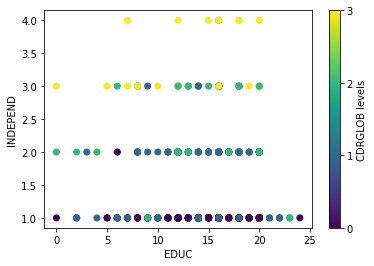

In [50]:
plt.scatter(training_data["EDUC"],training_data ["INDEPEND"],c=training_data["CDRGLOB"])
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("INDEPEND")
plt.xlabel("EDUC")
plt.show();

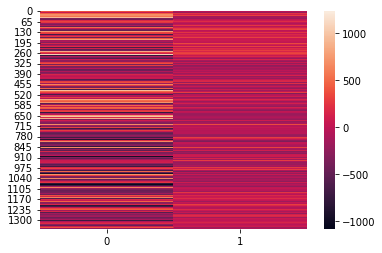

In [10]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
datadeg = embedding.fit_transform(data)
ax = sb.heatmap(datadeg)
ax

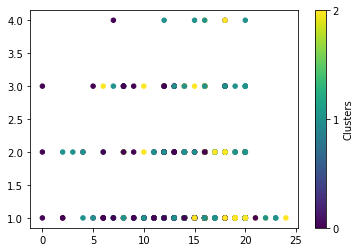

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=25)
clus = kmeans.fit_predict(training_data)
plt.scatter(training_data["EDUC"], training_data["INDEPEND"],c=clus, s=20)
plt.colorbar(label="Clusters",ticks=range(3))
plt.show();